# Before you start

In this class, we will be using Colab for assignments instead of regular Python files. Colab provides more efficient Google GPU and is easier for setting up. Colab is a very powerful platform and it functions very similarly to a Jupyter notebook. We'll  provide you a few tips on how to use Colab;  make sure you read them carefully!

☝ **Quick Colab Tips:**

*   Make sure you **create a copy** of the Colab before you start coding!!! (File->Save a copy in Drive). If you don't do this, you will lose everything when you close the page and we DON'T want that to happen to you!
*   Make sure you hit every play button that you need in previous cells, so that every function / variables you need is defined.
*   If you don't want to click everything individually, you can click Runtime and you will find "Run Before", "Run After", or "Run All".
*   When you reload the page, the runtime restarts and all variables in the environment are cleared, so you will need to re-run cells.
*   If you make changes to a definition in an earlier cell, remember to run the cell to actually update the definition. Then remember to re-run the cells after, or else they will still be using the previous value. 
*   For more tips on getting started, please take a look at this [video](https://www.youtube.com/watch?v=inN8seMm7UI&ab_channel=TensorFlow).


**❗ Collaboration policy form ❗**

Before you start coding, make sure to fill out the [collaboration policy form](https://docs.google.com/forms/d/e/1FAIpQLSew1CTPi2WdBOkw3kYINf3WE1iKSdUArJZmwuVFczvndkanFQ/viewform).

# Introduction

Welcome to your first assignment! In this assignment, you will be implementing your very first NLP model (Woohoo!) -- BOW for sentiment classification. In this assignment, you will be using a very useful NLP library (spaCy), and a popular machine learning library (scikit-learn, or sklearn) to help you with preprocessing the data and building the BOW model. In later lectures and assignments, you will learn to implement many of these NLP and ML functions yourself, but in "the real world" it is often more practical to use existing libraries like those provided by spaCy and sklearn than to implement these algorithms from scratch. So, in this assignment, we want you to learn how to use these libraries in a practical setting, and we'll later learn about how they work "under the hood".

The main learning objectives for this assignment are:

1. Use sklearn to implement a standard ML workflow (featurization, designing train-test splits, training a model, and evaluating the model). 
2. Use spaCy for standard NLP preprocessing steps (tokenization, lemmatization, tagging).
3. Understand and implement common featurization approaches for text classifiers (ngrams, weighting schemas, tagging)

The basic workflow for an NLP model contains the following steps:

1. Load data
2. Preprocess data
3. Extract Features
4. Train the model
5. Evaluate the model
6. Analyze model behavior

You will implement this full workflow in Part 1. In Part 2, you will experiment with improvments to step 1 (preprocessing). In Part 3, you will experiment with improvements to step 2 (features). 

# Installation and Imports

☝ **Quick Tip:** You can add "**!**" in front of a Linux command and it can run on Colab! 


In [1]:
!pip install spacy
!pip install sklearn

import csv
import pandas as pd
import random
from google.colab import drive
from functools import reduce
import spacy
import numpy
import pickle
import os
drive.mount("/content/drive", force_remount=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=e14747158590d64d05738f17b01ecf41f85232dc970e16f2be9e5e54ecb91001
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Mounted at /content/drive




# Part 1: Basic Workflow

### Step 1: Load the raw data from disk and explore the data

In this assignment, we will use a Twitter dataset with social media text. Download the dataset [from Google Drive here](https://drive.google.com/file/d/1AF2v6Cu_gNTe7lzpz_4zsMWMgJ-XjuSh/view?usp=sharing). Drag it into the 'Files' sidebar in this Colab to use the file in our code. 

In the dataset, the tweets are rated for three categories of sentiment: positive, negative and neutral. We will use the tweets in the `text` column and sentiment in the `sentiment` column. Read the pandas documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) if you are unfamiliar with dataframes.

In [2]:
# Change this filepath if you've placed the .csv elsewhere in your drive.
FILEPATH = "Tweets_5K.csv"

In [3]:
# check the data at first glimpse
df=pd.read_csv(FILEPATH)
df.head(10)

,textID,text,sentiment
0,cb774db0d1,"I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
2,088c60f138,my boss is bullying me...,negative
3,9642c003ef,what interview! leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive
7,50e14c0bb8,Soooo high,neutral
8,e050245fbd,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,positive


In [4]:
# Input: None
# Output: List<String> raw_tweets, List<Int> labels
def load_data():
  # Map positive tweets to 1, neutral tweets to 0, and negative tweets to -1.
  # TODO
  text_df=pd.read_csv(FILEPATH)
  raw_tweets=text_df['text'].apply(str).tolist()
  labels=text_df['sentiment'].tolist()
  labels=[1 if i=="positive" else 0 if i=="neutral" else -1 for i in labels]

  return raw_tweets, labels

Before you start to preprocess the data, you should always take a look at the dataset and get a sense of the data you're handling.


In [6]:
raw_tweets, labels = load_data()
for p, label in zip(raw_tweets[:10], labels[:10]):
  print(f"{label}:\t{p}\n")

0:	 I`d have responded, if I were going

-1:	 Sooo SAD I will miss you here in San Diego!!!

-1:	my boss is bullying me...

-1:	 what interview! leave me alone

-1:	 Sons of ****, why couldn`t they put them on the releases we already bought

0:	http://www.dothebouncy.com/smf - some shameless plugging for the best Rangers forum on earth

1:	2am feedings for the baby are fun when he is all smiles and coos

0:	Soooo high

0:	 Both of you

1:	 Journey!? Wow... u just became cooler.  hehe... (is that possible!?)



We can use matplotlib to see the ratio between positive, negative and neutral feedback.

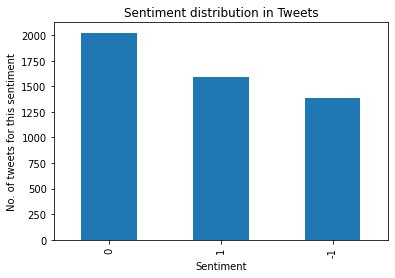

In [7]:
import matplotlib.pyplot as plt
plt.figure()
pd.value_counts(labels).plot.bar(title="Sentiment distribution in Tweets")
plt.xlabel("Sentiment")
plt.ylabel("No. of tweets for this sentiment")
plt.show()

### Step 2: Preprocess the data

In this first part, all of you need to to preprocess is just split the tweets by whitespace.

In [8]:
# Input: List<String> Raw tweets
# Output: List<List<String>>: preprocessed tweets.
# After preprocessing, each tweet should be represented as a list of words (tokens).

from nltk.tokenize import WhitespaceTokenizer
def preprocess(raw_X):
  # TODO Basic tokenization just based on whitespace, with no other preprocessing
   
   tk = WhitespaceTokenizer()
   pp_tweets=[tk.tokenize(twt) for twt in raw_X]

   return pp_tweets


### Step 3: Extract Features

In [10]:
from sklearn.feature_extraction import DictVectorizer
from collections import defaultdict
import gensim

from gensim import corpora

# Input: List<List<String>>: preprocessed Tweets, Optional[DictVectorizer]: dv, Boolean: isTest
# Output: Matrix<Float>: feature matrix, DictVectorizer: dv
def featurize(preproc_X, dv=None, isTest=False):
  # TODO: BOW feature creation function. 
  dicts =  []
  for p_twt in preproc_X:
    wd_dict = {}
    for i in range(len(p_twt)):
        wd_dict[p_twt[i]] = p_twt.count(
        p_twt[i]
        )
    dicts.append(wd_dict)
  # create dict every twt
  # End: TODO.
  # ===== DO NOT MODIFY ======
  if isTest is False:
    dv = DictVectorizer()
    X = dv.fit_transform(dicts)
    return X, dv
  else:
    return dv.transform(dicts), dv
  # =====================

### Step 4: Train the model

In [11]:
from sklearn.linear_model import LogisticRegression
# Input: Matrix<Float> X_train, Vector<Int> y_train
# Output: LogisticRegression clf
def train_classifier(X_train, y_train):
  lg_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

  return lg_clf
  
  # TODO train the logistic regression model
  # Hint: use sklearn's documentation, this should be a very simple function

### Step 5: Evaluate the model

To evaluate the model, we need to simulate the "real world" setting in which we have trained on our model on the data we have, but now we are using it to assigning labels to data we have never seen before. We will do this using k-fold cross validation. 

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called `k` that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation

In [12]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import KFold

# Input: Matrix<Float> X, Vector<Int> y, LogisticRegression trained_clf
# Output: Float accuracy
# Hint: you will need to reshape y as (-1, 1)
def evaluate_model(X, y, clf):
  # TODO evaluate the logistic regression model
  # Hint: use sklearn's documentation, this should be a very simple function
  
  return clf.score(X, y.reshape(-1,1))
  
# Input: List<List<String>> X, Vector<Int> y
# Output: List<Float> accuracies
def run_kfold_crossval(X, y, k=5, feature_fn=featurize):
  # TODO implement k-fold cross validation and return a list of accuracies
  # Hint: use sklearn's train_test_split with a 80/20 train/test split
  # Hint: or, investigate other functions from sklearn (sklearn.model_selection.KFold)
  acc_clf=[]
  X_new, dv=feature_fn(X)
  kf = KFold(n_splits=k)
  kf.get_n_splits(X)
  for train_index, test_index in kf.split(X_new):
     X_train, X_test = X_new[train_index.astype(int)], X_new[test_index.astype(int)]
     y_train, y_test = np.array(y)[train_index.astype(int)], np.array(y)[test_index.astype(int)]
     mod=train_classifier(X_train, y_train)
     acc_pd=evaluate_model(X_test, y_test, mod)
     acc_clf.append(acc_pd)

  return acc_clf, X_new, dv


### Step 6: Analyze Model Performance

Let's see how well our model is doing!

In [13]:
from scipy.stats import describe
from math import sqrt

def make_plots(perfs, names):
  means = []
  stds = []
  for i,perf in enumerate(perfs):
   n, minmax, mean, var, skew, kurt = describe(perf)
   means.append(mean)
   stds.append(sqrt(var))
   print("%s:\t%.03f"%(names[i], mean))
  plt.bar(np.arange(len(means)), means, yerr=stds)
  plt.xticks(np.arange(len(names)), names)
  plt.show()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


MFC Baseline:	0.405
Basic BOW:	0.586


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


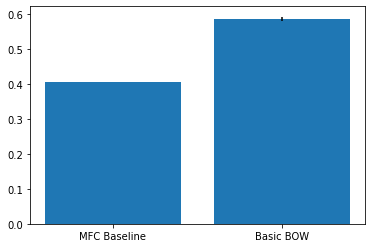

In [57]:
from collections import Counter

K_FOLD = 5
raw_tweets, y = load_data()

X_preproc = preprocess(raw_tweets)
basic_bow_accs , feat_matx, feat_dict = run_kfold_crossval(X_preproc, y, k=K_FOLD, feature_fn=featurize)

# here, we are going generate the "most frequent class" baseline based on the
# training data
counts = Counter(y).values()
mfc_baseline = [max(counts)/sum(counts)] * K_FOLD

# plot the results!
make_plots([mfc_baseline, basic_bow_accs], ["MFC Baseline", "Basic BOW"])  

### ❗ Conceptual Questions (Answer within the Colab cell). 👈👈👈 [Don't miss this section!]
You will need to write some code, or add some print statements to the functions you’ve already written, to help you answer the questions.

1. What are the dimensions of your feature matrix (X)?
2. What is the value of X[1460][1460]?
3. What feature does the 1460th column represent?
4. Run one iteration of your k-fold cross validation function to find an example of a word that appears in the test set but never appears in the training set. What word did you find, and what is the tweet in which it occurred?
5. What happens to that new word when the tweet is featurized at test time? I.e., what is the feature representation of the tweet that contains the unknown word?




In [100]:
print(feat_matx.shape)
print(feat_matx[1460, 1460])
print(feat_dict.get_feature_names_out()[1460])

X_preproc = preprocess(raw_tweets)
acc_clf=[]
X_new, dv=featurize(X_preproc)
kf = KFold(n_splits=5)
kf.get_n_splits(X_preproc)
for train_index, test_index in kf.split(X_new):
    X_train, X_test = X_new[train_index.astype(int)], X_new[test_index.astype(int)]
    y_train, y_test = np.array(y)[train_index.astype(int)], np.array(y)[test_index.astype(int)]
    mod=train_classifier(X_train, y_train)
    acc_pd=evaluate_model(X_test, y_test, mod)
    acc_clf.append(acc_pd)

print(acc_clf)


from itertools import compress
  
non_zero_wd = ((X_train!=0).sum(axis=0)==0).tolist()[0]
print(non_zero_wd)
res = list(compress(range(len(non_zero_wd)), non_zero_wd))
print(res)
print(dv.get_feature_names_out()[22])


filter_object = list(filter(lambda a: '#FollowFriday,' in a, X_preproc))
filter_object


[False, False, False, False, False, False, False, True, True, False, True, False, False, True, True, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, True, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, True, True, False, False, True, True, False, True, True, False, True, False, True, False, False, True, False, False, False, False, False, False, False, True, False, False, True, False, True, False, False, False, False, True, False, False, True, False, False, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, True, False, False, False, True, False, False, False, False, True, False, True, True, False, False, False, False, False, True, False, False, True, False, True

[['I',
  'would',
  'do',
  'a',
  '#FollowFriday,',
  'but',
  'everyone',
  'on',
  'my',
  'list',
  'is',
  'already',
  'on',
  'everyone',
  'elses',
  'list',
  'so',
  'what`s',
  'the',
  'point?',
  'I`m',
  'just',
  'not',
  'popular',
  'enough.']]

Answers for questions

- 1. The dimensions of your feature matrix (X) is 5000 x 15122.
- 2. The value of X[1460][1460] is 0
- 3. The feature the 1460th column represent is "check:"
- 4. Run one iteration of your k-fold cross validation function to find an example of a word that appears in the test set but never appears in the training set. We find an example word - **"#FollowFriday**". The word is in the tweet of ['I',
  'would',
  'do',
  'a',
  '#FollowFriday,',
  'but',
  'everyone',
  'on',
  'my',
  'list',
  'is',
  'already',
  'on',
  'everyone',
  'elses',
  'list',
  'so',
  'what`s',
  'the',
  'point?',
  'I`m',
  'just',
  'not',
  'popular',
  'enough.'] 
- 5. The unknow word that never appeared in the training set but in the test set while have one value in their sparse feature matrix.

# Part 2: Improved Preprocessing

In this section, we are going to improve the preprocessing step, but otherwise keep the above workflow the same. Write a new preprocessing function (`preprocessing_part2`) to do the following things. Then call `run_part2_workflow` and observe the difference in performance. 

For Part 2, your preprocessing function should do the following (not necessarily in this order):

* lowercasing
* lemmatization
* remove stop words
* remove punctuation and extra white space 
* use only top 1000 most frequent words, and replace the rest with OOV
* replace numbers with NUM

**Think about how each step affects the next one in the pipeline.** Specifically, one of these steps makes more sense to do last, so make sure your code reflects that.

Your final feature matrix should have 1001 columns (1000 most frequent words and one OOV token).

Use spacy to do these things. You shouldn't need to import any additional libraries (but hint: we've imported the Counter library in a previous cell). You can read the spacy documentation [here](http://spacy.pythonhumanities.com/01_02_linguistic_annotations.html#token-attributes) and [here](https://spacy.io/api/annotation#pos-tagging). 


Processed 0 out of 5000
Processed 1000 out of 5000
Processed 2000 out of 5000
Processed 3000 out of 5000
Processed 4000 out of 5000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


MFC Baseline:	0.405
Basic BOW:	0.586
BOW+preproc:	0.626


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


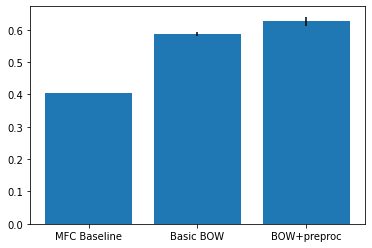

In [15]:
# Input: List<String> raw_tweets, Boolean from_cache, String cache_path
# Output: List<List<String>>: preprocessed tweets.
from collections import Counter
import itertools
import spacy
def preprocessing_part2(raw_tweets):
  
  # parse all the tweets with spacy
  # this will take a couple minutes the first time you run it;
  # it will save to a cache file, and will load from the cache file next time

  # ===== DO NOT MODIFY ======
  cache_path = "parsed_tweets.pickle"
  nlp = spacy.load('en_core_web_sm')
  if os.path.exists(cache_path): 
    print("Loading parses from cache at %s"%cache_path)
    parsed_tweets = pickle.load(open(cache_path, 'rb'))
  else:
    parsed_tweets = []
    for i,r in enumerate(raw_tweets):
      if i % 1000 == 0:
        print("Processed %d out of %d"%(i, len(raw_tweets)))
      parsed_tweets.append(nlp(r))
    if cache_path is not None:
       pickle.dump(parsed_tweets, open(cache_path, 'wb'))
  # ============================
  # TODO: preprocessing steps outlined above
  # 1. turn raw_tweet into spacy document
  spcy_tt=[nlp(raw_tt) for raw_tt in raw_tweets]
  stopwords = nlp.Defaults.stop_words
  
  # lemantize and remove punc
  lem_tt=[]
  for doc in spcy_tt:
    st = [x.lemma_ for x in doc if not x.is_punct]
    lem_tt.append(st)

  # remove stopwords and lower
  rm_tt=[]
  for doc in lem_tt:
    st = [x.lower() for x in doc if not x in stopwords]
    rm_tt.append(st)


  # No extrawhite space
  nw_tt=[]
  for doc in rm_tt:
      st=[x.strip(' ') for x in doc]
      st=[x for x in st if x != '']
      nw_tt.append(st)

  # replace digit by "NUM"
  dg_tt=[]
  for doc in nw_tt:
      temp=[]
      for ele in doc:
        if ele.isdigit():
          ele="NUM"
          temp.append(ele)
        else:
          temp.append(ele);
      dg_tt.append(temp)

  # use only top 1000 most frequent words, and replace the rest with OOV
  wd_bank = list(itertools.chain.from_iterable(dg_tt))
  word_freq = Counter(wd_bank)
  common_words = word_freq.most_common(1000)
  cm_wd_lst=[ele[0] for ele in common_words]

  # use just first 1000
  freq_tt=[]
  for doc in dg_tt:
      temp=[]
      for ele in doc:
        if ele in cm_wd_lst:
          temp.append(ele)
        else:
          ele="OOV"
          temp.append(ele);
      freq_tt.append(temp)
  
  return freq_tt



  # End TODO

X_preproc = preprocessing_part2(raw_tweets)

better_preproc_accs, feat_matx, feat_dict = run_kfold_crossval(X_preproc, y, k=K_FOLD)

make_plots([mfc_baseline, basic_bow_accs, better_preproc_accs],
           ["MFC Baseline", "Basic BOW", "BOW+preproc"])  

# Part 3: Improved Featurization

In this section, we will expand the featurize function to include more advanced and sophisticated features. You will now add 5-grams as features along with the unigrams to preserve the order of the sentence.

Loading parses from cache at parsed_tweets.pickle
MFC Baseline:	0.405
Basic BOW:	0.586
BOW+preproc:	0.626
Better Features:	0.537


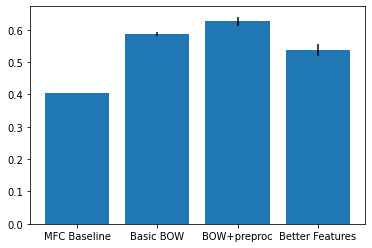

In [51]:
from collections import Counter
from itertools import chain

# Input: List<List<String>>: preproc_X
# Output: Matrix<Float>: feature matrix, DictVectorizer: dv, Boolean: isTest
def featurize_part3(preproc_X, dv=None, isTest = False):
  # TODO add 5-gram features to your feature function in addition to unigrams

  dicts =  []
  
  for p_twt in preproc_X:
    wd_dict = dict(Counter(chain.from_iterable(zip(sublist, sublist[1:], sublist[2:],sublist[3:],sublist[4:]) for sublist in p_twt)))
    dicts.append(wd_dict)


  # End: TODO.
  # ===== DO NOT MODIFY ======
  if isTest is False:
    dv = DictVectorizer()
    X = dv.fit_transform(dicts)
    return X, dv
  else:
    return dv.transform(dicts), dv
  # ====================

X_preproc = preprocessing_part2(raw_tweets)

better_feature_accs, feat_matx, feat_dict = run_kfold_crossval(X_preproc, y, k=K_FOLD,
                                         feature_fn=featurize_part3)

make_plots([mfc_baseline, basic_bow_accs, better_preproc_accs, better_feature_accs],
           ["MFC Baseline", "Basic BOW", "BOW+preproc", "Better Features"])  

# Extra credit challenge!

Congratulations on finishing all the mandatory parts in the first assignment! Hope you had a good time playing around with spaCy and sklearn. 

Here in this section, you will have the freedom to play around with other features mentioned in class, or that you come up with yourself! You will get an extra point if you are able to raise the Logistic Regression accuracy rate to >=68%.

Loading parses from cache at parsed_tweets.pickle


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


MFC Baseline:	0.405
Fine-tune BOW:	0.632


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


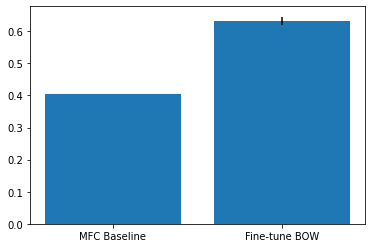

In [56]:

# Input: List<String> raw_tweets, Boolean from_cache, String cache_path
# Output: List<List<String>>: preprocessed tweets.
from collections import Counter
import itertools
import spacy
def preprocessing_part3(raw_tweets):
  
  # parse all the tweets with spacy
  # this will take a couple minutes the first time you run it;
  # it will save to a cache file, and will load from the cache file next time

  # ===== DO NOT MODIFY ======
  cache_path = "parsed_tweets.pickle"
  nlp = spacy.load('en_core_web_sm')
  if os.path.exists(cache_path): 
    print("Loading parses from cache at %s"%cache_path)
    parsed_tweets = pickle.load(open(cache_path, 'rb'))
  else:
    parsed_tweets = []
    for i,r in enumerate(raw_tweets):
      if i % 1000 == 0:
        print("Processed %d out of %d"%(i, len(raw_tweets)))
      parsed_tweets.append(nlp(r))
    if cache_path is not None:
       pickle.dump(parsed_tweets, open(cache_path, 'wb'))
  # ============================
  # TODO: preprocessing steps outlined above
  # 1. turn raw_tweet into spacy document
  spcy_tt=[nlp(raw_tt) for raw_tt in raw_tweets]
  stopwords = nlp.Defaults.stop_words
  
  # lemantize and remove punc
  lem_tt=[]
  for doc in spcy_tt:
    st = [x.lemma_ for x in doc if not x.is_punct]
    lem_tt.append(st)

  # remove stopwords and lower
  rm_tt=[]
  for doc in lem_tt:
    st = [x.lower() for x in doc if not x in stopwords]
    rm_tt.append(st)


  # No extrawhite space
  nw_tt=[]
  for doc in rm_tt:
      st=[x.strip(' ') for x in doc]
      st=[x for x in st if x != '']
      nw_tt.append(st)

  # replace digit by "NUM"
  dg_tt=[]
  for doc in nw_tt:
      temp=[]
      for ele in doc:
        if ele.isdigit():
          ele="NUM"
          temp.append(ele)
        else:
          temp.append(ele);
      dg_tt.append(temp)

  # use only top 1000 most frequent words, and replace the rest with OOV
  wd_bank = list(itertools.chain.from_iterable(dg_tt))
  word_freq = Counter(wd_bank)
  common_words = word_freq.most_common(5000)
  cm_wd_lst=[ele[0] for ele in common_words]

  # use just first 1000
  freq_tt=[]
  for doc in dg_tt:
      temp=[]
      for ele in doc:
        if ele in cm_wd_lst:
          temp.append(ele)
        else:
          ele="OOV"
          temp.append(ele);
      freq_tt.append(temp)
  
  return freq_tt


  # End TODO


K_FOLD = 5
raw_tweets, y = load_data()


X_preproc = preprocessing_part3(raw_tweets)

FT_bow_accs , feat_matx, feat_dict = run_kfold_crossval(X_preproc, y, k=K_FOLD, feature_fn=featurize)

# here, we are going generate the "most frequent class" baseline based on the
# training data
counts = Counter(y).values()
mfc_baseline = [max(counts)/sum(counts)] * K_FOLD

# plot the results!
make_plots([mfc_baseline, FT_bow_accs], ["MFC Baseline", "Fine-tune BOW"])  


From the above four experiments, we see a good direction is keeping the prepossessing steps for text and add the BOG model. The extra part, to boost the efficiency we work more on part of word frequency - top 5000 frequent words. Adimittedly, we are not reaching 0.68, but we therefore have the final accuracy result as 0.632.



# Submission Instructions
Please submit this Colab as **two** files to Gradescope:
1.   A `.py` file: Click File > Download > Download .py
2.   A `.ipynb` file with outputs: Click Runtime > Run All, and then after all outputs are complete, click File > Download > Download .ipynb

Please ensure that the `.ipynb` contains actual function outputs (and not leftover print statements, for instance). We will run your `.ipynb` file; if our outputs don't match the outputs in your submitted file (within reason), you will receive a 0 on this assignment.

Last updated: 20 Sep 2022